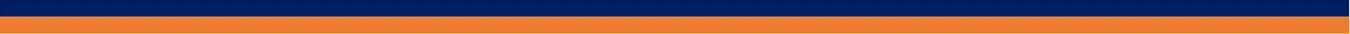


<h1><center><font size=10><a name='link6'>Data Science and Business Analytics</a></center></font></h1>


<h1><center>Portfolio Project 15 </center></h1>
<h1><center>  Determining whether CO2 Emission from Cars Depends on 
             Fuel Type or Manufacturer using ANOVA TEST </center></h1>



<h1><center> By </center></h1>



<h1><center>Hayford I. Osumanu </center></h1>



<h1><center>April 2023 </center></h1>


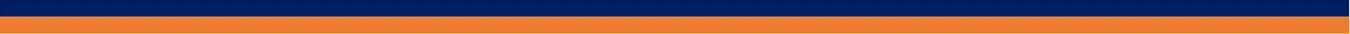

# <h1><left><font size=8><a name='link6'>Project Summary Code </a></center></font></h1>

## Problem Statement

### Traffic management inspector in a certain city wants to understand whether carbon emissions from different cars are different. The inspector has reasons to believe that Fuel type (LPG,Petrol or Petrol (E85-Flex Fuel)) and car manufacturer (Audi, BMW, Ford, Volvo) may be the factors responsible for differences in carbon emission. To acheive this purpose, TMI team obtained a random samples from all registered cars on the road in that city and would like to compare the amount of carbon emission release. This problem is essentially a problem of identification of the source(s) of variation in the data. 

## ANOVA will be used to test whether:

### - Carbon emission depends on fuel type only using One-way ANOVA

### - Carbon emission depends on manufacturer only using One-way ANOVA

### - Carbon emission depends on both fuel type and manufacturer both using Two-way ANOVA

## Objective of the Study

### The objective is to determine whether CO2 emission from cars depends on fuel type or manufacturer or both.

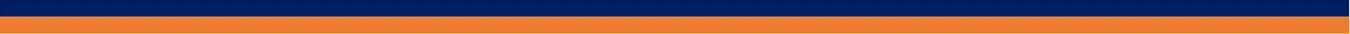

# <h1><left><font size=8><a name='link6'>Part I: Dataset Overview </a></center></font></h1>

In [ ]:
# Extracting the first 4 rows ofthe dataset
data.head(4)

,Car_ID,manufacturer,fuel_type,co_emissions
0,1,Audi,Petrol,441.55
1,2,BMW,E85,376.47
2,3,BMW,E85,414.12
3,4,BMW,E85,351.41


In [ ]:
# Checking the dimension (number of observations/rows and variables/columns of the Dataset (df.shape)
print("There are", data.shape[0], "rows and", data.shape[1], "columns.")

There are 510 rows and 4 columns.


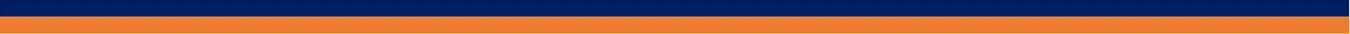

# <h1><left><font size=8><a name='link6'>Part II: Exploratory Data Analysis (EDA) </a></center></font></h1>

# Descriptive Summary with Minimum observations

In [ ]:
# let's view the statistical summary of numerical columns in the data, min values highlighted
data.describe(include=np.number).T.style.highlight_min(color="green", axis=0)
    

,count,mean,std,min,25%,50%,75%,max
co_emissions,510.000000,358.456882,66.912999,162.070000,312.630000,356.190000,410.645000,544.560000


image.png

# Descriptive Summary with Maximum observations

In [ ]:
# let's view the statistical summary of numerical columns in the data, max values highlighted
data.describe(include=np.number).T.style.highlight_max(color="indigo", axis=0)

,count,mean,std,min,25%,50%,75%,max
co_emissions,510.000000,358.456882,66.912999,162.070000,312.630000,356.190000,410.645000,544.560000


image.png

# Quantiles Summary with Maximum observations

In [ ]:
# Extracting the Quantiles of the dataset max highlighted
data.quantile([0.25, 0.5, 0.6, 0.75, 0.9, 0.95, 0.99]).T.style.highlight_max(
    color="purple", axis=0
)

,0.250000,0.500000,0.600000,0.750000,0.900000,0.950000,0.990000
co_emissions,312.630000,356.190000,371.354000,410.645000,443.288000,468.430500,521.309800


image.png

# Quantiles Summary with Minimum Observations

In [ ]:
# Extracting the Quantiles of the dataset min values highlighted
data.quantile([0.25, 0.5, 0.6, 0.75, 0.9, 0.95, 0.99]).T.style.highlight_min(
    color="red", axis=0
)

,0.250000,0.500000,0.600000,0.750000,0.900000,0.950000,0.990000
co_emissions,312.630000,356.190000,371.354000,410.645000,443.288000,468.430500,521.309800


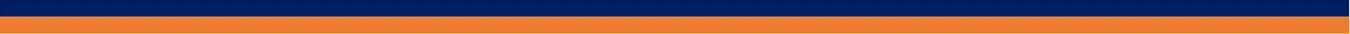

# Descriptive Summary of Categorical Variables

In [ ]:
# Summarize categorical features
data.describe(include=['object'])

,manufacturer,fuel_type
count,510,510
unique,4,3
top,Audi,Petrol
freq,142,179


image.png

# Bar Plot of Categorical Variables

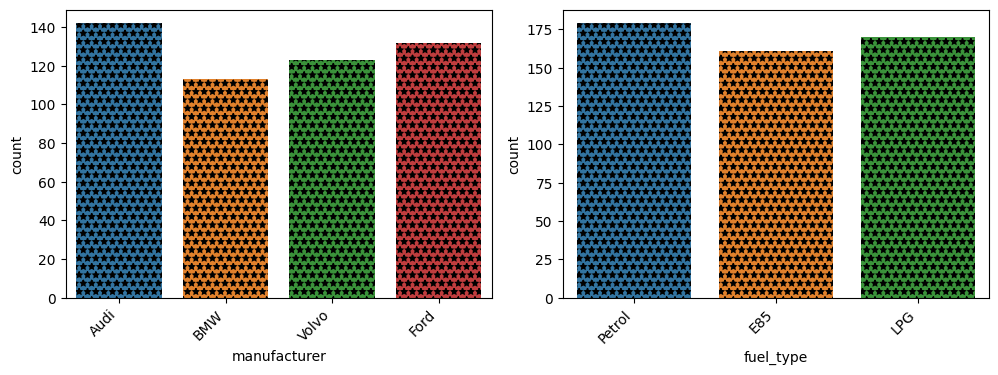

In [ ]:
# Checking the count plots of the categorical Variables
cols = 5
rows = 5
num_cols = data.select_dtypes(include="object")
fig = plt.figure(figsize=(25, 18))

for i, col in enumerate(num_cols):

    ax = fig.add_subplot(rows, cols, i + 1)

    sns.countplot(x=data[col], ax=ax, hatch="**")

    plt.xticks(rotation=45, ha="right")

fig.tight_layout()
plt.show()

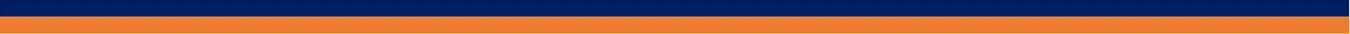

# Multivariate Data Analysis

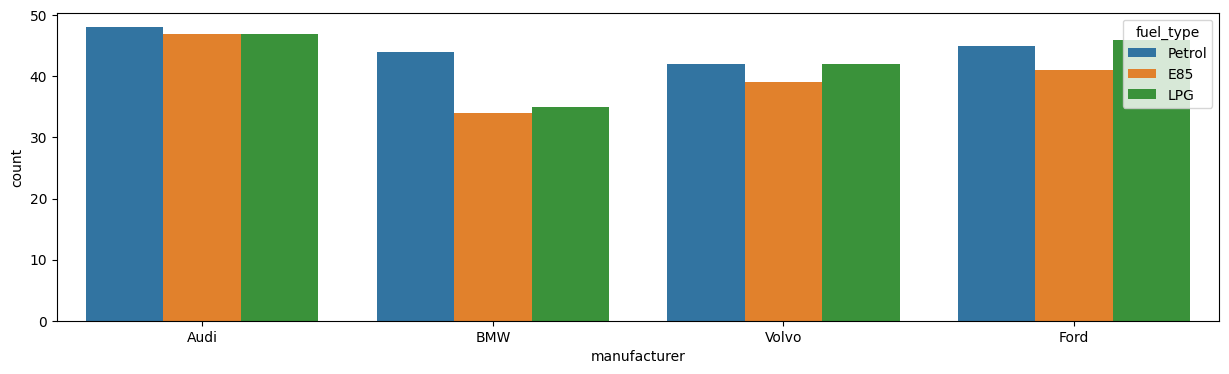

In [ ]:
# Distribution of Manufacture by Fuel Types
fig = plt.subplots( figsize=(15, 4))

sns.countplot(x='manufacturer', hue="fuel_type", data=data)

plt.show()

image.png

# Box Plot of Numerical Variable with respect to the Target Variable

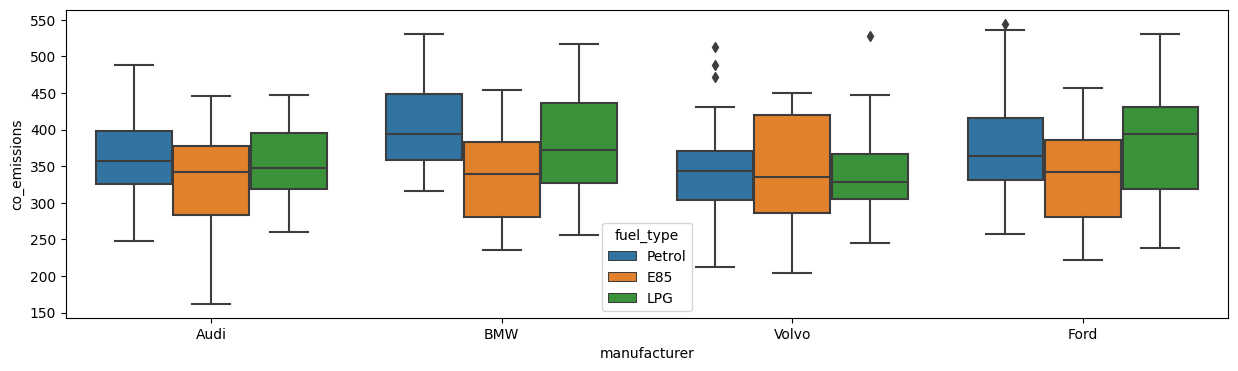

In [ ]:
# Box plot of Co-emissions by Manufactures and Fuel_types
fig= plt.subplots(figsize=(15, 4))
sns.boxplot(data=data, x="manufacturer", y='co_emissions', hue="fuel_type")


plt.show()

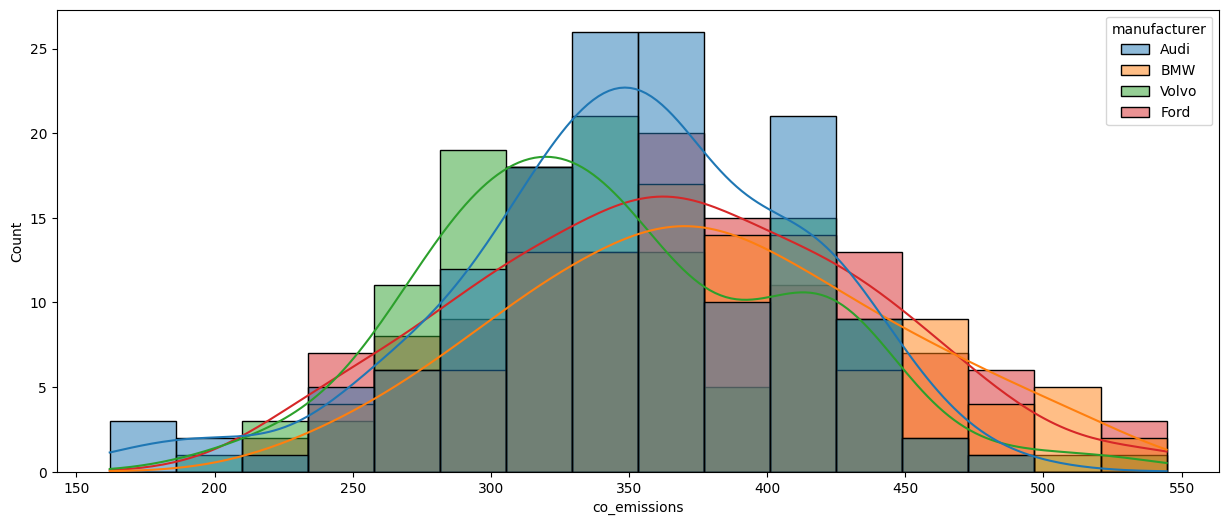

In [ ]:
# ploting a histogram of Co_emissions vs Manufacturer
plt.figure(figsize = (15,6))
sns.histplot(data = data, x = 'co_emissions', hue = 'manufacturer', kde = True);

image.png

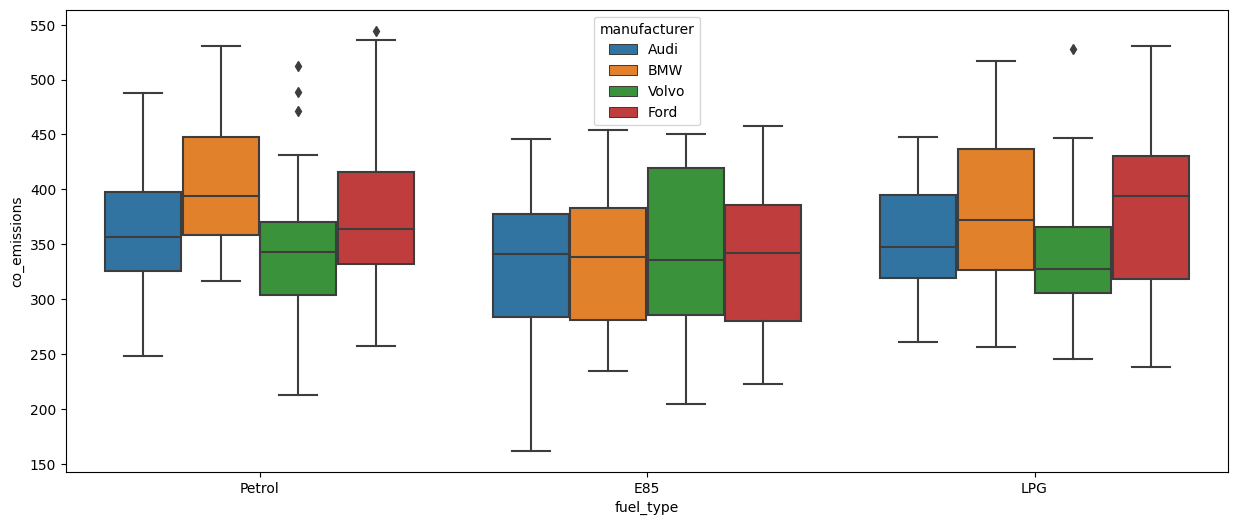

In [ ]:
# Box plot of Co-emissions by Fuel Type and Manufacturer
fig= plt.subplots(figsize=(15, 6))
sns.boxplot(data=data, x="fuel_type", y='co_emissions', hue="manufacturer")


plt.show()

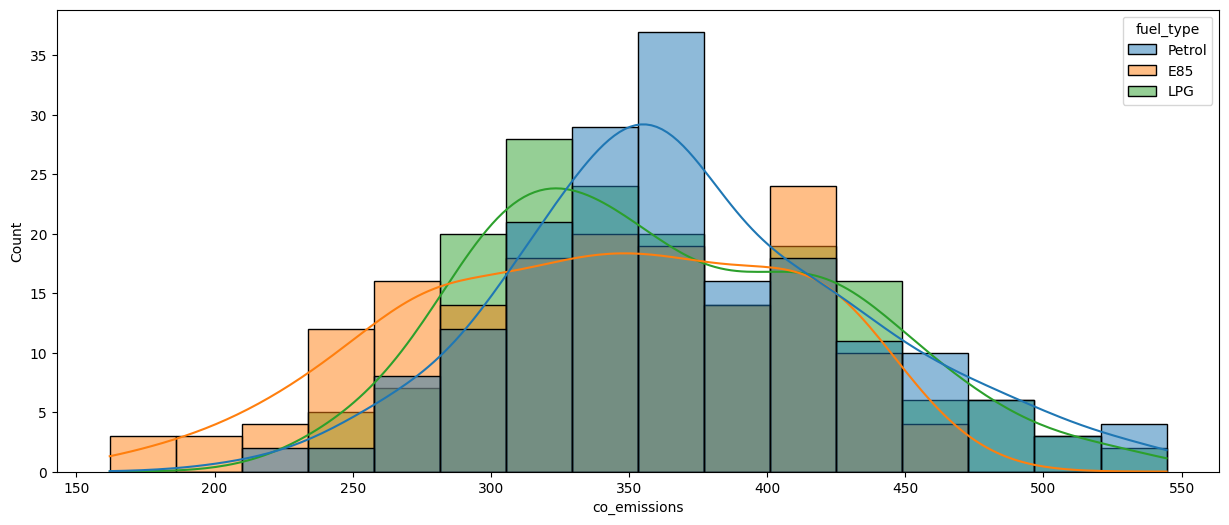

In [ ]:
# ploting a histogram of Co_emissions vs Fuel Type
plt.figure(figsize = (15,6))
sns.histplot(data = data, x = 'co_emissions', hue = 'fuel_type', kde = True);

image.png

### Histogram Box Plot of the Target Variable with respect to the Numerical Variables

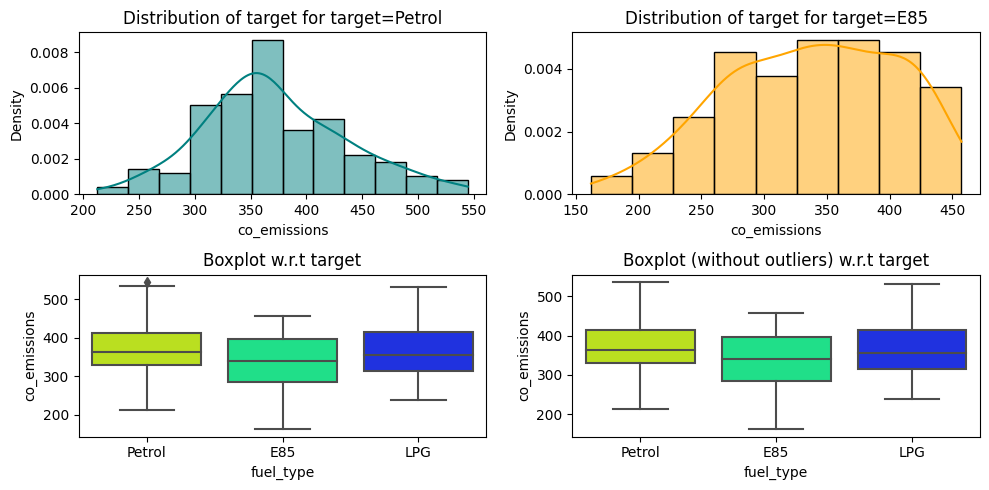

In [ ]:
distribution_plot_wrt_target(data, "co_emissions", "fuel_type")  

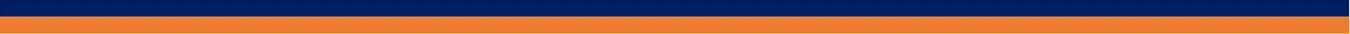

### FaceGrid Plot of Target with respect to Numerical Variables

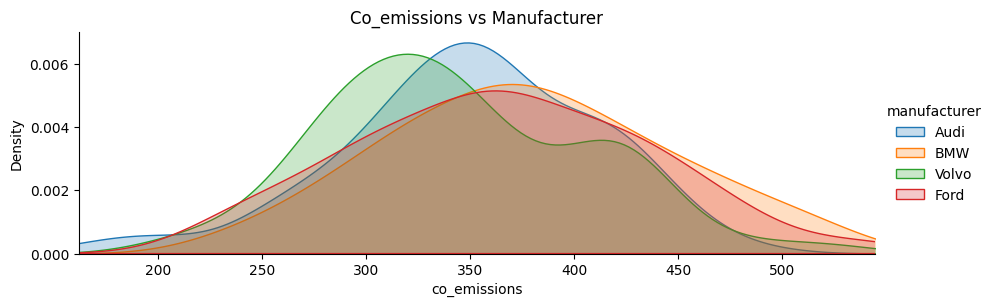

In [ ]:
facet = sns.FacetGrid(data, hue="manufacturer",aspect=3)
facet.map(sns.kdeplot,"co_emissions",shade= True)
facet.set(xlim=(data["co_emissions"].min(), data["co_emissions"].max()));
facet.add_legend();
plt.title('Co_emissions vs Manufacturer')
plt.show()

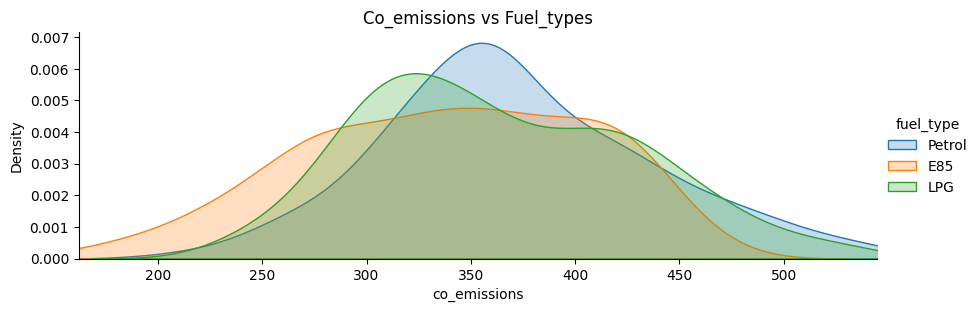

In [ ]:
facet = sns.FacetGrid(data, hue="fuel_type",aspect=3)
facet.map(sns.kdeplot,"co_emissions",shade= True)
facet.set(xlim=(data["co_emissions"].min(), data["co_emissions"].max()));
facet.add_legend();
plt.title('Co_emissions vs Fuel_types')
plt.show()

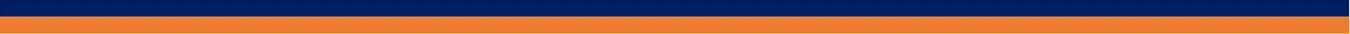

# Sunburst Charts

In [ ]:
# Sunburst of a rectangular DataFrame with discrete color argument in px.sunburst
import plotly.express as px
fig = px.sunburst(data, path=['manufacturer', 'fuel_type'], values='co_emissions', color='fuel_type')
fig.show()

In [ ]:
# Sunburst of a rectangular DataFrame with discrete color argument in px.sunburst
import plotly.express as px
fig = px.sunburst(data, path=['fuel_type', 'manufacturer'], values='co_emissions')
fig.show()

In [ ]:
import plotly.express as px
fig = px.sunburst(data, path=['fuel_type','manufacturer'], values='co_emissions', color='manufacturer',
                  color_discrete_map={'(?)':'red', 'Lunch':'gold', 'Dinner':'green'})
fig.show()

In [ ]:
import plotly.express as px
fig = px.sunburst(df, path=['fuel_type', 'manufacturer'], values='co_emissions', color='manufacturer',
                  color_discrete_map={'(?)':'black', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.show()

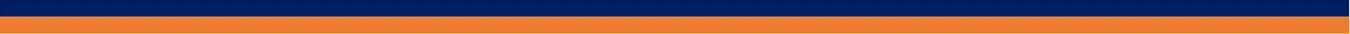

# <h1><left><font size=8><a name='link6'>Part III: One Way Hypothesis Testing </a></center></font></h1>

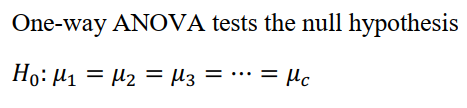

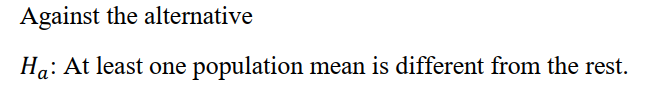

#### Assumptions for ANOVA

1. All populations under consideration have normal distribution

2. All populations under consideration have equal variances.

3. The sample is a random sample, i.e. the observations are collected independently ofeach other.

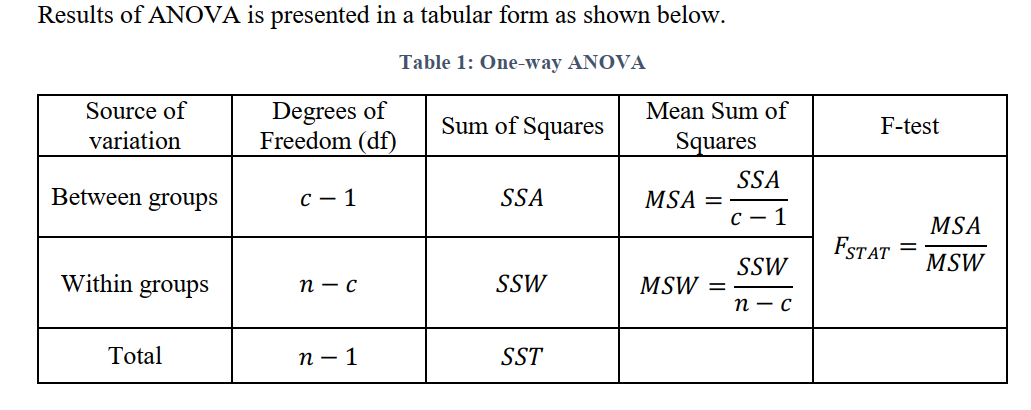

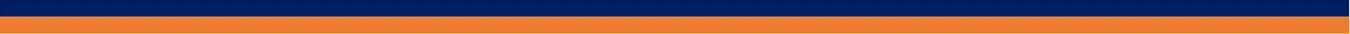

#  Factor I: Fuel Type Test


### Frequency counts and descriptive summary of carbon emission at different levels of the factors are shown below.

In [ ]:
# #Factor 1: fuel_type
data['fuel_type'].value_counts()

Petrol    179
LPG       170
E85       161
Name: fuel_type, dtype: int64

In [ ]:
data.groupby("fuel_type")["co_emissions"].describe()

,count,mean,std,min,25%,50%,75%,max
fuel_type,,,,,,,,
E85,161.00,338.12,67.98,162.07,283.93,339.96,397.50,457.27
LPG,170.00,363.74,64.94,238.33,313.82,354.91,413.85,530.87
Petrol,179.00,371.72,63.77,212.71,329.07,362.67,413.53,544.56


In [ ]:
#Factor 2: Manufacturer
data['manufacturer'].value_counts()

Audi     142
Ford     132
Volvo    123
BMW      113
Name: manufacturer, dtype: int64

In [ ]:
data.groupby("manufacturer")["co_emissions"].describe()

,count,mean,std,min,25%,50%,75%,max
manufacturer,,,,,,,,
Audi,142.00,349.73,61.27,162.07,316.01,351.47,394.67,487.88
BMW,113.00,377.54,68.44,234.88,328.92,374.81,420.76,530.85
Ford,132.00,365.08,70.36,222.35,313.63,362.30,416.42,544.56
Volvo,123.00,343.90,63.56,204.11,299.32,333.05,396.83,527.90


### Test 1: Whether there is any dependency on Co_ecission of Fuel Type

#### We need to test the hypothesis that the use of three different fuel types does not impact carbon emission


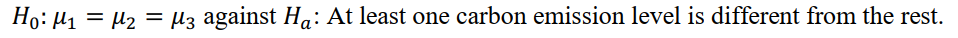

In [ ]:
import plotly.express as px
fig = px.sunburst(data, path=['fuel_type','manufacturer'], values='co_emissions', color='manufacturer',
                  color_discrete_map={'(?)':'red', 'Lunch':'gold', 'Dinner':'green'})
fig.show()

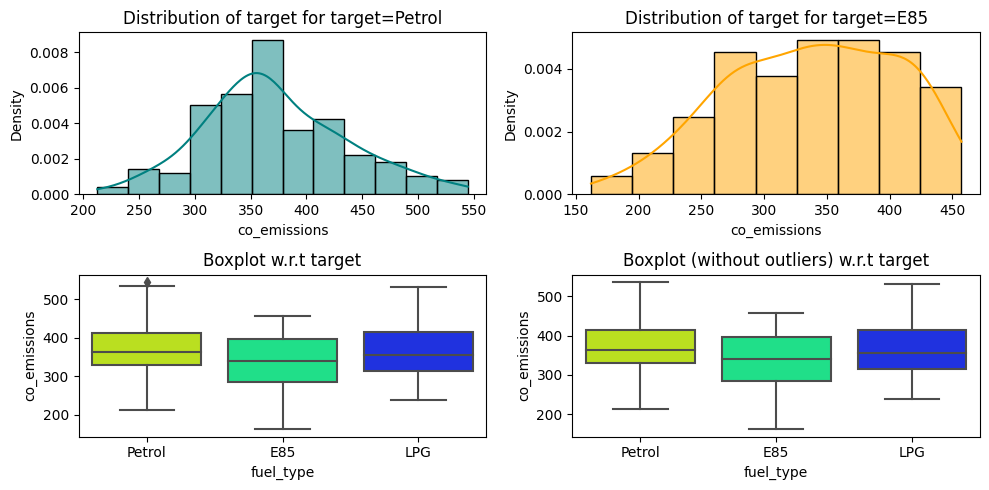

In [ ]:
distribution_plot_wrt_target(data, "co_emissions", "fuel_type")  

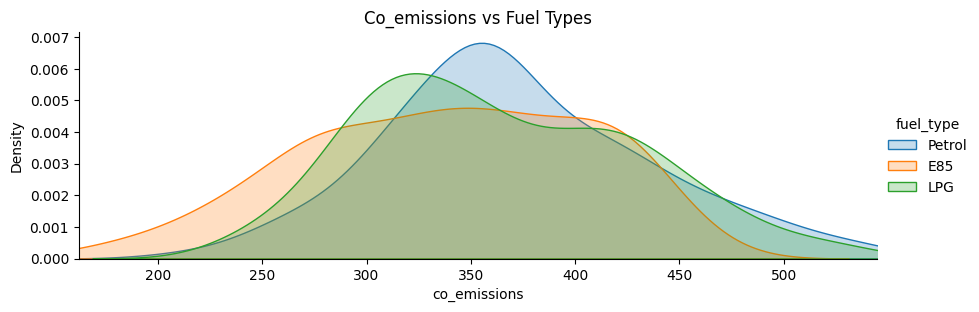

In [ ]:
facet = sns.FacetGrid(data, hue="fuel_type",aspect=3)
facet.map(sns.kdeplot,"co_emissions",shade= True)
facet.set(xlim=(data["co_emissions"].min(), data["co_emissions"].max()));
facet.add_legend();
plt.title('Co_emissions vs Fuel Types')
plt.show()

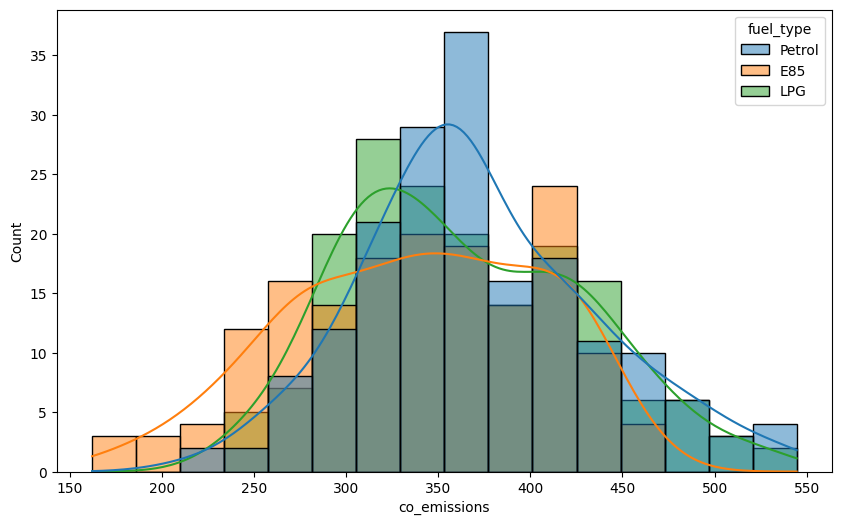

In [ ]:
# ploting a histogram of Co_emissions vs Fuel Type
plt.figure(figsize = (10,6))
sns.histplot(data = data, x = 'co_emissions', hue = 'fuel_type', kde = True);

### For testing of normality, Shapiro-Wilk’s test is applied to the response.

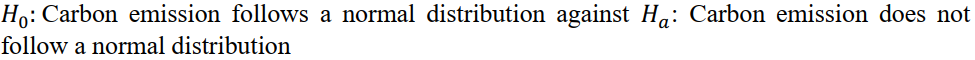

In [ ]:
#Aussmption 1: Normality
from scipy import stats
w, p_value = stats.shapiro(data['co_emissions'])
print("W = {}".format(w), "p_value = {}".format(p_value))


W = 0.9970722794532776 p_value = 0.49750789999961853


### Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.49750789999961853 is greater than the level of significance, we fail to reject the null hypothesis.


### Observations

#### Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Test for Homogeneity


#### Next, we need to test the assumption that at all three levels of the factor fuel_type, population variance is equal. In other words, the homogeneity of variance assumption is satisfied. We may formulate the problem as:

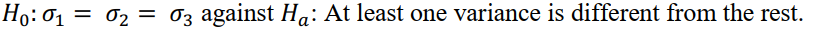

In [ ]:
#Aussmption 2: Homogeneity of Variance
statistic, p_value = stats.levene(
data['co_emissions'][data['fuel_type']=="Petrol"],
data['co_emissions'][data['fuel_type']=="E85"],
data['co_emissions'][data['fuel_type']=="LPG"])
print("statistic = {}".format(statistic), "p_value = {}".format(p_value))

statistic = 1.6432552897712633 p_value = 0.19437768490117


### Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.19437768490117 is greater than the level of significance, we fail to reject the null hypothesis.


#### Observation:
#### Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances. Once the two assumptions of one-way ANOVA are satisfied, we can now compare the population means.

# Apply one-way ANOVA - F Test for Fuel Types


In [ ]:
mod = ols('co_emissions ~ fuel_type', data = data).fit()
aov_tbl = sm.stats.anova_lm(mod, type = 1)
print(aov_tbl)

              df     sum_sq  mean_sq     F  PR(>F)
fuel_type   2.00  102812.96 51406.48 11.98    0.00
Residual  507.00 2176157.90  4292.22   NaN     NaN


#### Observations

#### From the summary output, it can be observed that:

- sum of squares due to the factor fuel_type (SSB) is 102813 and the sum
of squares due to error (SSW) is 2176158.

- The total sum of squares (SST) for the data is(102813+2176158=2278971). 

- Since the factor has 3 levels, degree of freedom (df) corresponding to fuel_type is 3 – 1 = 2. 

- Total degree of freedom (df) is 510 – 1 = 509. 

- Hence degree of freedom (df) due to error is 509 – 2 = 507. 

- Mean sum of squares is obtained by dividing the sums of squares by corresponding df. 

- The value of the F - statistic is approximately 12 and the p-value is highly significant.

#### Based on the ANOVA test we, therefore, reject the null hypothesis that the three population means are identical. At least for one fuel-type mean carbon emission is different from the rest.

### Residual Plots for Fuel Types

In [ ]:
QQ = ProbPlot(model_norm_residuals)

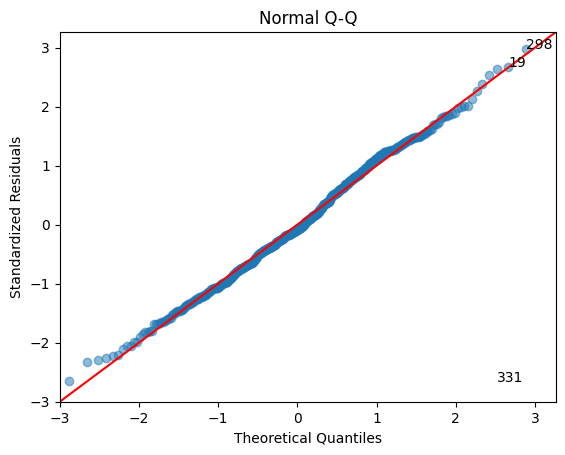

In [ ]:
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
  plot_lm_2.axes[0].annotate(i,xy=(np.flip(QQ.theoretical_quantiles, 0)[r],model_norm_residuals[i]))

#### Note that once the null hypothesis of equality of means is rejected, the next natural question is to find out which mean(s) is different from the rest. Before we answer that question, let us first check whether carbon emission is dependent on the manufacturer.

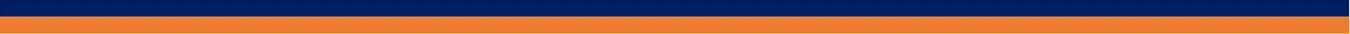


## Test 2: Manufacture Dependency Test: Whether there is any dependency on Co_emissions of Manufacturer

#### We need to test the hypothesis that carbon emission is the same for all car manufacturer.

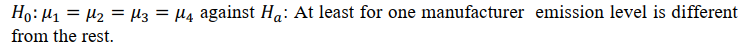

In [ ]:
import plotly.express as px
fig = px.sunburst(data, path=['manufacturer','fuel_type'], values='co_emissions', color='fuel_type',
                  color_discrete_map={'(?)':'red', 'Lunch':'gold', 'Dinner':'green'})
fig.show()

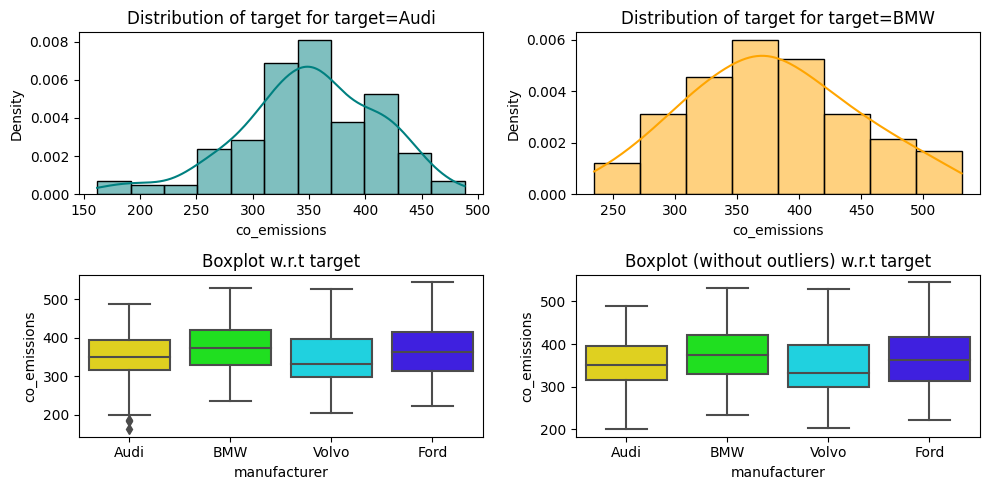

In [ ]:
distribution_plot_wrt_target(data, "co_emissions", "manufacturer")  

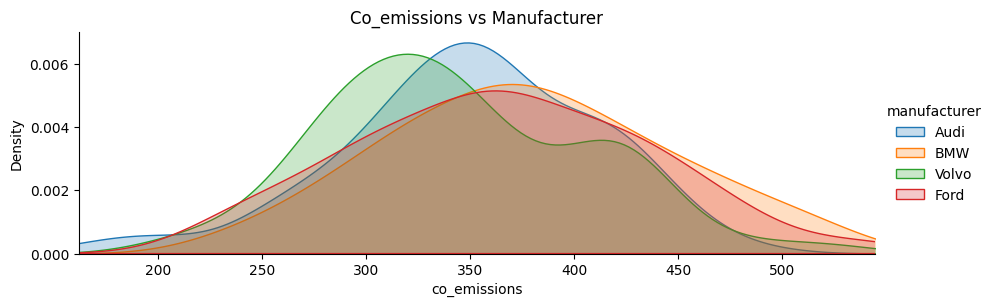

In [ ]:
facet = sns.FacetGrid(data, hue="manufacturer",aspect=3)
facet.map(sns.kdeplot,"co_emissions",shade= True)
facet.set(xlim=(data["co_emissions"].min(), data["co_emissions"].max()));
facet.add_legend();
plt.title('Co_emissions vs Manufacturer')
plt.show()

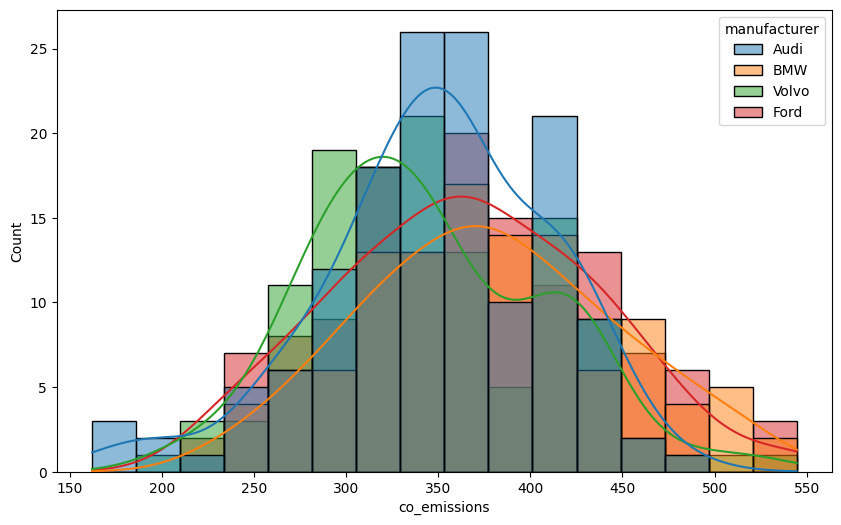

In [ ]:
# ploting a histogram of Co_emissions vs Manufacturer
plt.figure(figsize = (10,6))
sns.histplot(data = data, x = 'co_emissions', hue = 'manufacturer', kde = True);

#### Normality assumption has already been tested for this data.Hence, equality or Homogenety of variance assumption needs to be checked for manufacture

#### In order to test the assumption that for all four manufacturers, population variance is equal to the following null and alternative hypothesis are defined as:

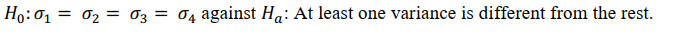

In [ ]:
statistic, p_value = stats.levene(
data['co_emissions'][data['manufacturer']=="Audi"],
data['co_emissions'][data['manufacturer']=="BMW"],
data['co_emissions'][data['manufacturer']=="Volvo"],
data['co_emissions'][data['manufacturer']=="Ford"])
print("statistic = {}".format(w), "p_value = {}".format(p_value))

statistic = 0.9970722794532776 p_value = 0.20131599109069698


### Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.20131599109069698 is greater than the level of significance, we fail to reject the null hypothesis.


#### Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances and can say that population variances are equal across different manufacturers. As all the assumptions of one-way ANOVA are satisfied, we can now compare the population means with respect to the manufacturer.

# Apply one-way ANOVA - F Test for Manufacturer

In [ ]:
#Apply one-way ANOVA
mod = ols('co_emissions ~ manufacturer', data = data).fit()
aov_tbl = sm.stats.anova_lm(mod, type = 1)
print(aov_tbl)

                 df     sum_sq  mean_sq    F  PR(>F)
manufacturer   3.00   83824.57 27941.52 6.44    0.00
Residual     506.00 2195146.29  4338.23  NaN     NaN


#### From the output above, it can be observed that:
- The sum of squares due to the manufacturer (SSB) is 83825 and the sum of squares due to error (SSW) is 2195146. 

- The total sum of squares (SST) for the data is (83825+2195146=2278971). 

- Since the factor has 4 levels, DF corresponding to the manufacturer is 4 – 1 = 3. 

- Total DF is 510 – 1 = 509. Hence DF due to error is 509 – 3 = 506.

- Mean sum of squares is obtained by dividing the sums of squares by corresponding DF. 

- The value of the F-statistic is approximately 6 and the p-value is highly significant.

### Therrfore, based on the ANOVA test, we reject the null hypothesis that the four population means are the same. This means that at least for one manufacturer mean carbon emission is different from the rest.

### Two important points need to be noted here

- Whether we are testing equality of mean across fuel type or manufacturer, SST is constant given data. In this case SST = 2278971.

- Total DF is constant given a data and is equal to n – 1. Since sample size is 510, total
DF = 509.

### Residual plots are shown below for different manufacturers.

In [ ]:
QQ = ProbPlot(model_norm_residuals)

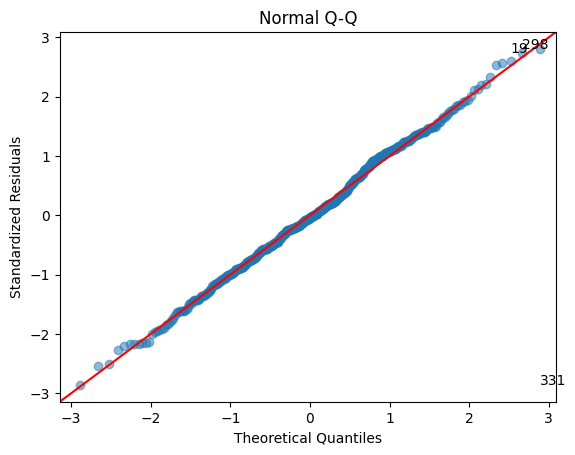

In [ ]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
  plot_lm_2.axes[0].annotate(i,xy=(np.flip(QQ.theoretical_quantiles, 0)[r],model_norm_residuals[i]))

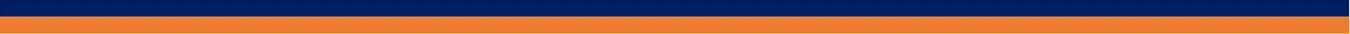

## Multiple Comparison Test: The Tukey’s HSD and Tukey-Kramer procedure

### We have observed that Fuel_type and Manufacturer individually have a significant impact on Carbon emission as null hypotheses that group means are equal have been rejected in both cases. However, we have not been able to determine which mean is different from the rest or whether all pairs of means are different. 

### Multiple comparison tests for Fuel Type

#### In order to identify for which fuel type mean carbon emission is different from other groups, the hypotheses may be stated as:

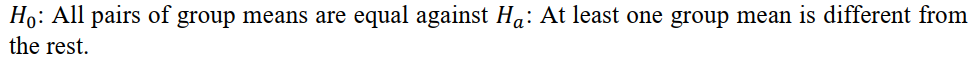

### The null and alternative hypothesis as:

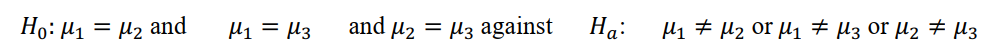

### where 𝜇1represents mean carbon emission when fuel type is E85, 𝜇2 represents mean carbon emission when fuel type is LPG and 𝜇3 is the same for Petrol.

In [ ]:
# Posthoc test: Tukey test
MultiComp=MultiComparison(data['co_emissions'],data['fuel_type'])
print(MultiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   E85    LPG  25.6199 0.0012  8.6843 42.5554   True
   E85 Petrol  33.5984    0.0 16.8712 50.3256   True
   LPG Petrol   7.9785 0.4916 -8.5139  24.471  False
----------------------------------------------------


### From the above analysis, it can be observed that: 
- P-value is significant for comparing carbon emission mean levels for the pair LPG-E85 and
Petrol-E85, but not for Petrol-LPG. 

- The null hypothesis of equality of all population means is rejected. 

- It is now clear that mean carbon emission for Petrol and LPG is similar but emission
for fuel type E85 is significantly different from these two.

#### Note also that, the numerical values of the differences being positive, mean carbon emission for fuel type E85 is significantly lower than that for petrol or LPG. This same observation is borne out by the residual plot above where the values of the residuals corresponding to E85 is lower compared to the other fuel types, which are much closer.

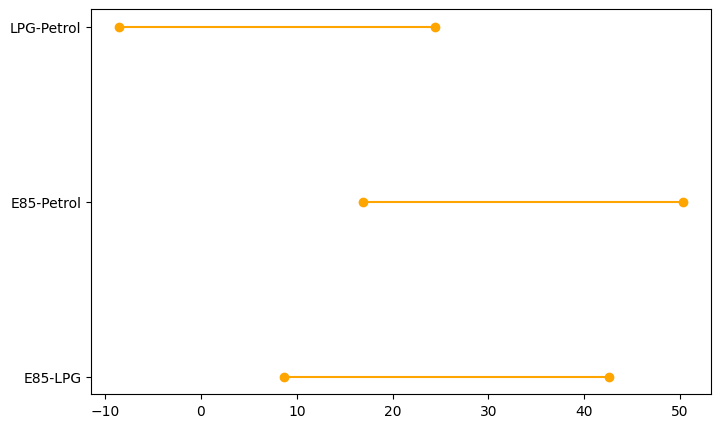

In [ ]:
#for family wise comparison
results = MultiComp.tukeyhsd()
df=results.summary()
results_as_html = df.as_html()
df1=pd.read_html(results_as_html, header=0, index_col=0)[0].reset_index(
)
groups = np.array([df1.group1+ '-'+ df1.group2])
plt.figure(figsize=(8,5))
data_dict = {}
data_dict['category'] = groups.ravel()
data_dict['lower'] = results.confint[:,0]
data_dict['upper'] = results.confint[:,1]
dataset = pd.DataFrame(data_dict)
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(data))):
  plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.yticks(range(len(dataset)),list(dataset['category']));

#### The output above represent the pair-wise comparisons from Tukey’s HSD for fuel
type. 

- The confidence intervals not containing 0 is for the difference between LPG & E85 and
for the difference between Petrol & E85. 

- This indicates that population means of these pairs of fuels are different. 

- From the values of the pairwise differences, it may also be concluded that carbon emission from cars using E85 is significantly less than the other two.


#### Let us now determine cars by which manufacturer have a mean carbon emission level different from the others

### Multiple comparison tests for Manufacturer

### In order to identify for which manufacturer mean carbon emission is different from others, the hypotheses may be stated as:

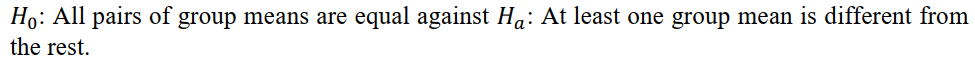

### The null and alternative hypotheses as

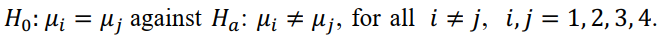

#### Note: Subscript 1 here represents the mean value of Audi, 2 represent the mean value of 2 BMW, 3 Ford and 4 Volvo.

In [ ]:
## post hoc test
MultiComp=MultiComparison(data['co_emissions'],data['manufacturer'])
print(MultiComp.tukeyhsd().summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  Audi    BMW  27.8115 0.0048   6.4094 49.2136   True
  Audi   Ford  15.3513 0.2177  -5.1752 35.8778  False
  Audi  Volvo   -5.829 0.8897  -26.741 15.0831  False
   BMW   Ford -12.4602 0.4528 -34.2186  9.2982  False
   BMW  Volvo -33.6405 0.0006  -55.763 -11.518   True
  Ford  Volvo -21.1803 0.0516 -42.4568  0.0963  False
-----------------------------------------------------


#### From the table above, it can be observed that:

##### There is a significant difference in mean carbon emission between 

- (i) BMW and Audi; between 

- (ii) Volvo and BMW and between

- (iii) Volvo and Ford

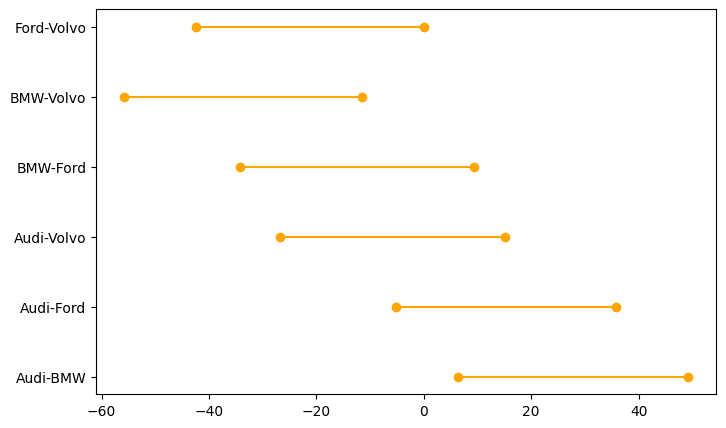

In [ ]:
#for family wise comparison
results = MultiComp.tukeyhsd()
df=results.summary()
results_as_html = df.as_html()
df1=pd.read_html(results_as_html, header=0, index_col=0)[0].reset_index(
)
groups = np.array([df1.group1+ '-'+ df1.group2])
plt.figure(figsize=(8,5))
data_dict = {}
data_dict['category'] = groups.ravel()
data_dict['lower'] = results.confint[:,0]
data_dict['upper'] = results.confint[:,1]
dataset = pd.DataFrame(data_dict)
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(data))):
  plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.yticks(range(len(dataset)),list(dataset['category']));

### Here, it can be observed that: 
- the confidence intervals of difference of mean carbon emission for the pairs BMW and Audi, Volvo and BMW, and Volvo and Ford do not contain
zero, therefore these pairs are significantly different from each other.

## Special Notes

- ANOVA procedure is sensitive on both normality and homogeneity of variance assumptions.

- For test of normality, we have started with overall normality test. In this case, the null hypothesis of normality is not rejected. 

- However, there will be situations when overall normality test will be rejected. If so, then normality test must be carried out within each group.
If a factor has K levels, then K separate tests of normality must be performed and all K distributions must be normal.

- In case where at least in one group normality assumption is violated, a non-parameteric alternative to ANOVA must be employed. This is known as Kruskal-Walli’s test. 

- This test depends on the ranking of the observations, rather than the values of the observations.

- Homogeneity of variance assumption is also a very important assumption. If the group variances are not assumed equal, then the F-test for ANOVA is not defined. 

Recall also that the MSE = SSE/df is an estimate of the variance. If the equality of variance is rejected and if the groups have equal sample sizes, then F-test is a robust test; otherwise the test is biased with
inflated Type I error probability.

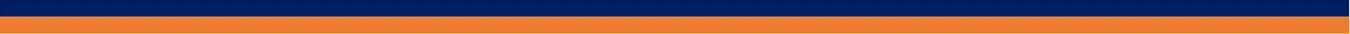

# <h1><left><font size=8><a name='link6'>Part IV: Two Way Hypothesis Testing </a></center></font></h1>

#### In practical scenario almost never only one factor is studied in isolation for its effect on the response. 

- In case of one-way ANOVA, one does not have the flexibility to evaluate how responses to one treatment behave with respect to the levels of other treatments.

- Therefore, multi-factor experiments are extremely common and preferable in practice.

- Two-way ANOVA uses two factors (independent or interacting) to test various hypotheses of interest. 

- With two factors we may think of a contingency table with the levels of the two factors making up the rows and the columns. 

- The system of notation is rather complex. Let the two factors be denoted by A and B, levels of one will be in the row and levels of the other will be in the column of the contingency table.

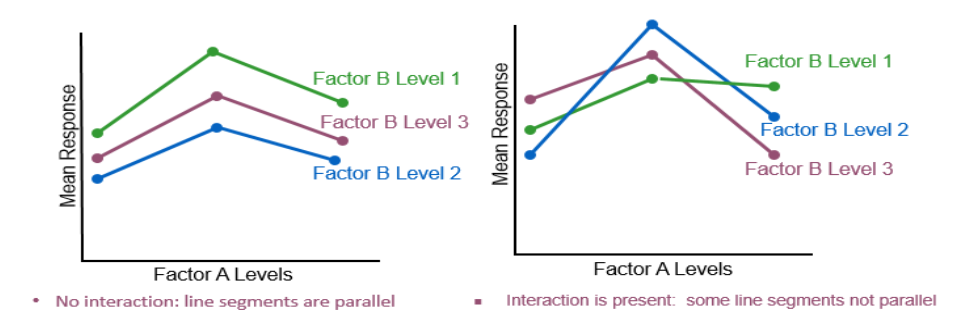

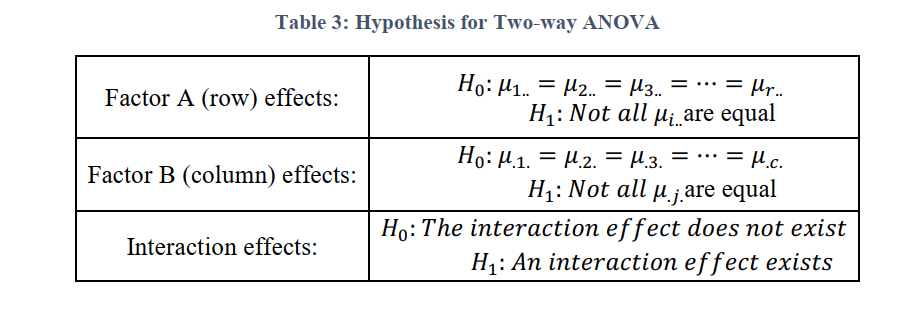

Two-way ANOVA follows the same assumptions as one-way ANOVA:

-  Populations are normally distributed. (Use Shapiro-Wilk test)

-  Populations have equal variances. (Use Levene’s test)

-  Samples are randomly and independently drawn.

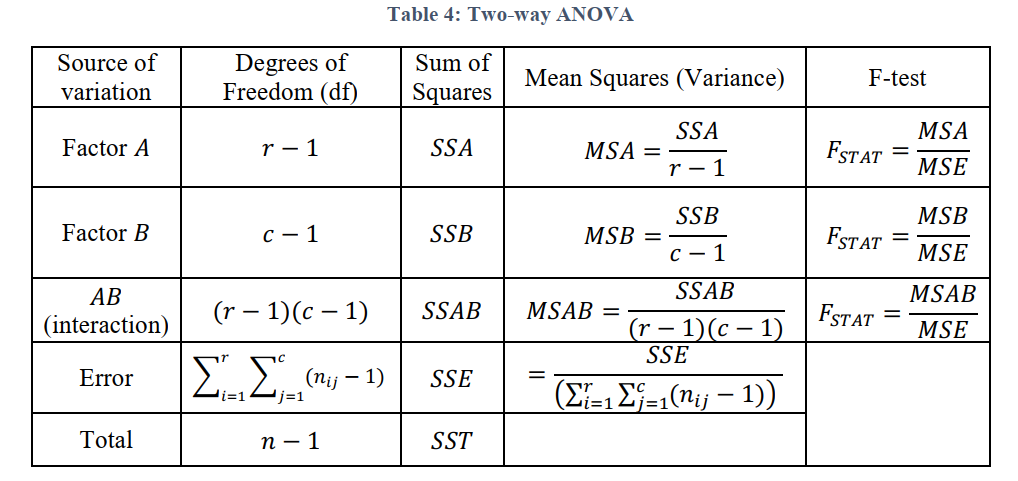

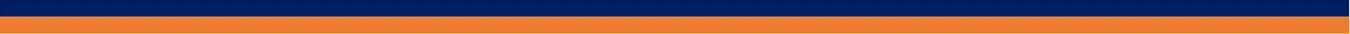

## Test 3:whether there is any dependency on Co-emission of X1 𝑎𝑛𝑑 𝑋2 (Fuel type and Manufacturer) together

#### To visualize interaction effect, a graphical representation of mean fuel_type across different manufacturers 

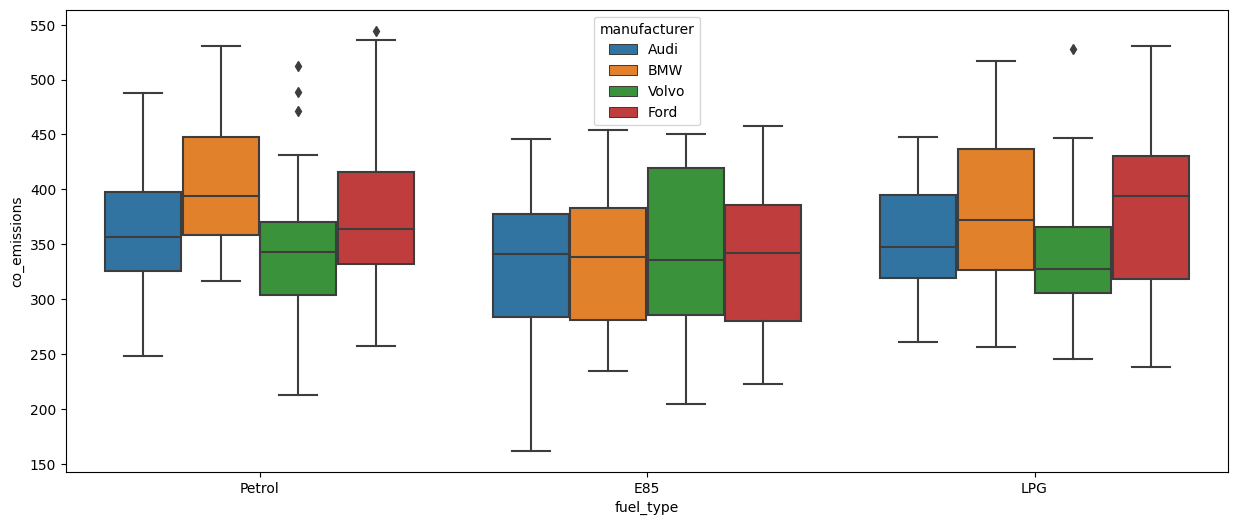

In [ ]:
fig, axes = plt.subplots()
fig.set_size_inches(15,6)
a = sns.boxplot(data = data, y = "co_emissions", x = "fuel_type" , hue = 'manufacturer', orient = "v")

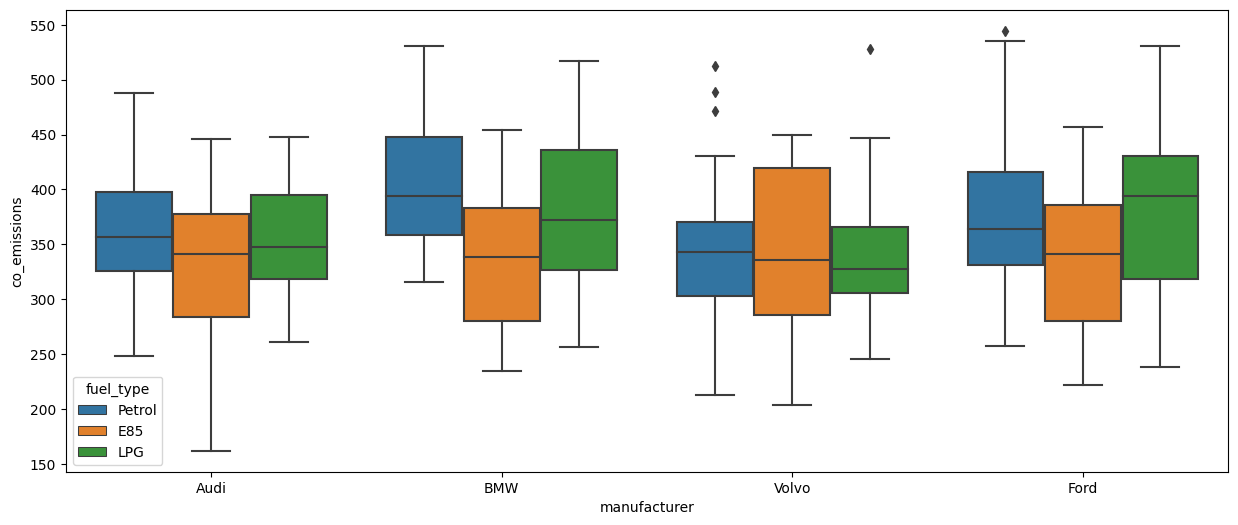

In [ ]:
fig, axes = plt.subplots()
fig.set_size_inches(15,6)
a = sns.boxplot(data = data, y = "co_emissions", x = "manufacturer" , hue = 'fuel_type', orient = "v")

#### To visualize interaction effect, a graphical representation of mean fuel_type across different manufacturers is shown in above. It is observed that the lines are not parallel. Mean carbon emission is lowest with E85 for all cars except Volvo. This indicates interaction effect between fuel_type and manufacturer.

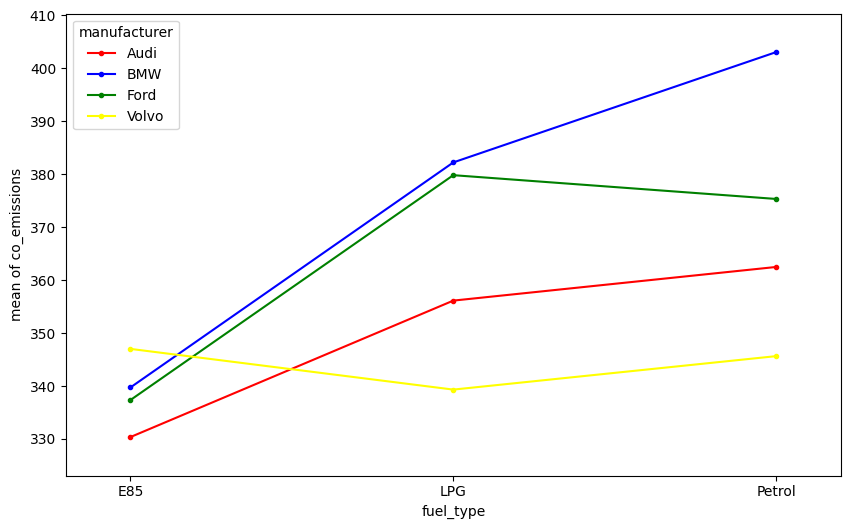

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
fig = interaction_plot(x=data['fuel_type'], trace=data['manufacturer'], response=data["co_emissions"],
                       colors=['red', 'blue','green','yellow'], ylabel='co_emissions', xlabel='fuel_type',ax=ax)
plt.show()

In [ ]:
# Extracting the cross tabulation for fuel type and manufacturer
pd.crosstab(data['fuel_type'],data['manufacturer'])

manufacturer,Audi,BMW,Ford,Volvo
fuel_type,,,,
E85,47,34,41,39
LPG,47,35,46,42
Petrol,48,44,45,42


In [ ]:
# Extracting the summary statistics of fuel type and manufacturer
data.groupby(['fuel_type','manufacturer'])['co_emissions'].mean()

fuel_type  manufacturer
E85        Audi           330.33
           BMW            339.70
           Ford           337.32
           Volvo          346.99
LPG        Audi           356.11
           BMW            382.22
           Ford           379.81
           Volvo          339.30
Petrol     Audi           362.47
           BMW            403.06
           Ford           375.31
           Volvo          345.62
Name: co_emissions, dtype: float64

In [ ]:
# Extracting the summary statistics of fuel type and manufacturer
data.groupby(['fuel_type','manufacturer'])['co_emissions'].describe()

count   mean   std    min    25%    50%    75%    max
fuel_type manufacturer                                                       
E85       Audi          47.00 330.33 73.74 162.07 283.80 341.53 377.44 446.12
          BMW           34.00 339.70 61.07 234.88 280.55 338.62 382.84 454.18
          Ford          41.00 337.32 65.91 222.35 280.21 341.58 385.44 457.27
          Volvo         39.00 346.99 70.05 204.11 285.41 335.77 419.19 449.98
LPG       Audi          47.00 356.11 49.84 260.63 318.86 347.75 394.74 447.37
          BMW           35.00 382.22 71.32 256.20 326.53 372.47 436.26 516.96
          Ford          46.00 379.81 72.87 238.33 318.48 394.36 430.78 530.87
          Volvo         42.00 339.30 57.37 245.55 305.61 327.77 366.11 527.90
Petrol    Audi          48.00 362.47 54.08 247.94 326.00 356.56 397.89 487.88
          BMW           44.00 403.06 59.14 316.12 358.75 393.81 448.04 530.85
          Ford          45.00 375.31 65.62 257.72 331.56 364.09 415.55 544.56
          Volvo         42.00 345.62 64.41 212.71 303.37 343.12 370.40 512.34

### Two Way Hypothesis testing

#### The normality assumption on the data has already been tested but homogeneity of variance assumption needs to be checked for both the factors together.

#### In order to test the assumption that for all 12 groups, the null and alternative hypothesis for population variance can be defined as:

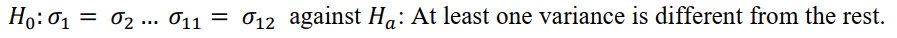

In [ ]:
#Aussmption 2: Homogeneity test
statistic, p_value = stats.levene(data['co_emissions'][data['fuel_type']=="Petrol"][data['manufacturer']=="Audi"],
data['co_emissions'][data['fuel_type']=="E85"][data['manufacturer']=="Audi"],
data['co_emissions'][data['fuel_type']=="LPG"][data['manufacturer']=="Audi"],
data['co_emissions'][data['fuel_type']=="Petrol"][data['manufacturer']=="BMW"],

data['co_emissions'][data['fuel_type']=="E85"][data['manufacturer']=="BMW"],
data['co_emissions'][data['fuel_type']=="LPG"][data['manufacturer']=="BMW"],
data['co_emissions'][data['fuel_type']=="Petrol"][data['manufacturer']=="Ford"],
data['co_emissions'][data['fuel_type']=="E85"][data['manufacturer']=="Ford"],

data['co_emissions'][data['fuel_type']=="LPG"][data['manufacturer']=="Ford"],
data['co_emissions'][data['fuel_type']=="Petrol"][data['manufacturer']=="Volvo"],
data['co_emissions'][data['fuel_type']=="E85"][data['manufacturer']=="Volvo"],
data['co_emissions'][data['fuel_type']=="LPG"][data['manufacturer']=="Volvo"])

print("statistic = {}".format(w), "p_value = {}".format(p_value))

statistic = 0.9970722794532776 p_value = 0.06799587238101185


In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.06799587238101185 is greater than the level of significance, we fail to reject the null hypothesis.


#### Since the p-value is large from 0.05 level of significance therefore, we do not reject the null hypothesis of homogeneity of variances.

### Two-way ANOVA procedure - F Test

In [ ]:
mod =ols('co_emissions ~ fuel_type*manufacturer', data = data).fit()
aov_tbl = sm.stats.anova_lm(mod, type = 2)
print(aov_tbl)

                           df     sum_sq  mean_sq     F  PR(>F)
fuel_type                2.00  102812.96 51406.48 12.54    0.00
manufacturer             3.00   79335.63 26445.21  6.45    0.00
fuel_type:manufacturer   6.00   54846.39  9141.06  2.23    0.04
Residual               498.00 2041975.88  4100.35   NaN     NaN


#### As we noticed in  one-way ANOVA, 

- total sum of squares for a given data set is the same. SST for this data is 2278971.


- When only fuel type is the predictor, (102813/2278971=) 4.5% of total variability is explained by it. 

- When only manufacturer is the predictor (83825/2278971=) 3.7% of total variability is explained by it. 

- However, when both the factors are in the model (236995/2278971=) 10.4% of total variability is explained by both main effects and their interaction effects. 

-As more factors are being included in the model, SSE is being reduced. 

- The aim of ANOVA is to explain the total variability in the data, i.e. to assign the variability to definitive causes.

#### Note also that all three hypotheses are significant at 5% level. Therefore, our conclusion based on two-way ANOVA test, we reject the null hypothesis that all group means are equal for fuel type; we reject the hypothesis that all group means are equal for manufacturers. Similarly, equality of means at each combination of fuel type and manufacturer levels is also rejected.

In [ ]:
# grand means
#Car_ID represents value counts
print('Grand Mean',results.data.mean())
print(np.round(data.groupby('fuel_type').agg({'co_emissions':'mean','Car_ID':'count'}).T,2))

Grand Mean 358.4568823529412
fuel_type       E85    LPG  Petrol
co_emissions 338.12 363.74  371.72
Car_ID       161.00 170.00  179.00


In [ ]:
## manufacturer
print('Grand Mean',results.data.mean())
print(np.round(data.groupby('manufacturer').agg({'co_emissions':'mean','Car_ID':'count'}).T,2))

Grand Mean 358.4568823529412
manufacturer   Audi    BMW   Ford  Volvo
co_emissions 349.73 377.54 365.08 343.90
Car_ID       142.00 113.00 132.00 123.00


In [ ]:
## fuel_type:manufacturer
print(np.round(data.groupby(['manufacturer','fuel_type']).agg({'co_emissions':'mean','Car_ID':'count'}),2))

                        co_emissions  Car_ID
manufacturer fuel_type                      
Audi         E85              330.33      47
             LPG              356.11      47
             Petrol           362.47      48
BMW          E85              339.70      34
             LPG              382.22      35
             Petrol           403.06      44
Ford         E85              337.32      41
             LPG              379.81      46
             Petrol           375.31      45
Volvo        E85              346.99      39
             LPG              339.30      42
             Petrol           345.62      42


#### Since equality of means hypothesis is rejected, we need to find out which group means are different from the rest. Tukey-test for multiple comparisons is applied. For the main effects, the results are very similar to one-way ANOVA. Hence these are not included here.

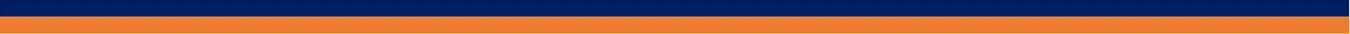

###  Multiple Comparison of Means - Tukey HSD 

In [ ]:
### Posthoc test
MultiComp = MultiComparison(data['co_emissions'],data['fuel_type']
)
print(MultiComp.tukeyhsd().summary())
results = MultiComp.tukeyhsd()
# Multiple Comparison of Means - Tukey HSD, FWER=0.05

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   E85    LPG  25.6199 0.0012  8.6843 42.5554   True
   E85 Petrol  33.5984    0.0 16.8712 50.3256   True
   LPG Petrol   7.9785 0.4916 -8.5139  24.471  False
----------------------------------------------------


In [ ]:
MultiComp = MultiComparison(data['co_emissions'],data['manufacturer'])
print(MultiComp.tukeyhsd().summary())
results = MultiComp.tukeyhsd()

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  Audi    BMW  27.8115 0.0048   6.4094 49.2136   True
  Audi   Ford  15.3513 0.2177  -5.1752 35.8778  False
  Audi  Volvo   -5.829 0.8897  -26.741 15.0831  False
   BMW   Ford -12.4602 0.4528 -34.2186  9.2982  False
   BMW  Volvo -33.6405 0.0006  -55.763 -11.518   True
  Ford  Volvo -21.1803 0.0516 -42.4568  0.0963  False
-----------------------------------------------------


In [ ]:
data['Car_Fuel'] = data.manufacturer + ':' + data.fuel_type
MultiComp = MultiComparison(data['co_emissions'],data['Car_Fuel'])
print(MultiComp.tukeyhsd().summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower    upper   reject
------------------------------------------------------------------
   Audi:E85     Audi:LPG  25.7811 0.7257  -17.5943  69.1564  False
   Audi:E85  Audi:Petrol  32.1377 0.3773  -11.0111  75.2865  False
   Audi:E85      BMW:E85   9.3667    1.0  -37.9736   56.707  False
   Audi:E85      BMW:LPG  51.8848 0.0163    4.9386   98.831   True
   Audi:E85   BMW:Petrol  72.7291    0.0   28.6206 116.8376   True
   Audi:E85     Ford:E85   6.9898    1.0  -37.9444  51.9241  False
   Audi:E85     Ford:LPG  49.4761 0.0116    5.8657  93.0865   True
   Audi:E85  Ford:Petrol  44.9831 0.0385    1.1285  88.8378   True
   Audi:E85    Volvo:E85  16.6606 0.9887  -28.8848  62.2061  False
   Audi:E85    Volvo:LPG   8.9706    1.0  -35.6771  53.6182  False
   Audi:E85 Volvo:Petrol  15.2927 0.9935  -29.3549  59.9403  False
   Audi:LPG  Audi:Petrol   6.3566    1.0  -36.7922  49.5055  F

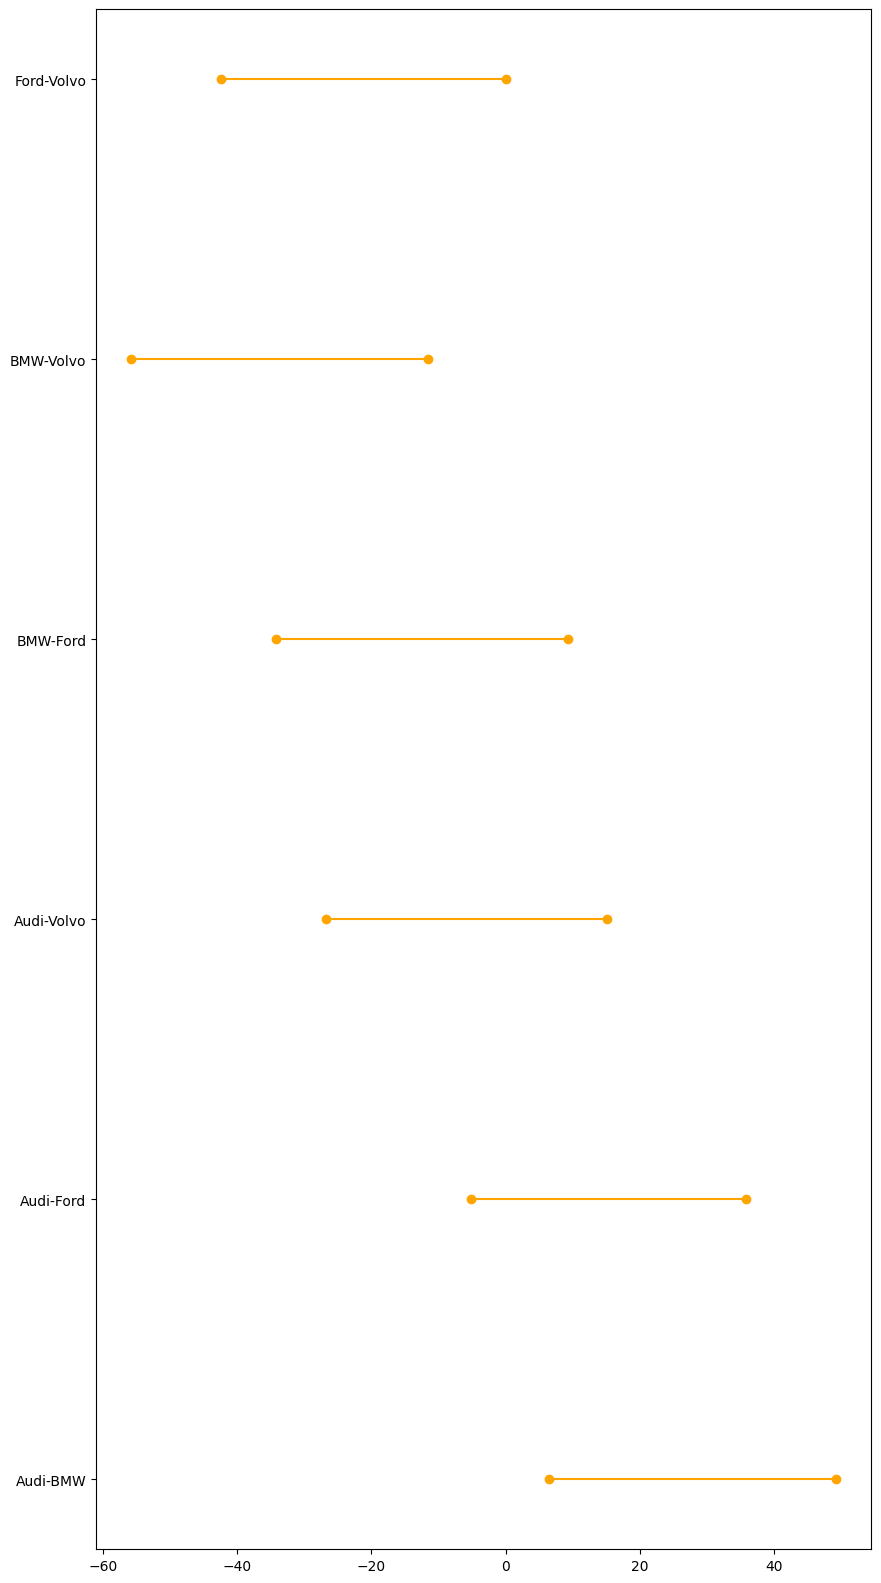

In [ ]:
df=results.summary()
results_as_html = df.as_html()
df1=pd.read_html(results_as_html, header=0, index_col=0)[0].reset_index(
)
groups = np.array([df1.group1+ '-'+ df1.group2])
plt.figure(figsize=(10,20))
data_dict = {}
data_dict['category'] = groups.ravel()
data_dict['lower'] = results.confint[:,0]
data_dict['upper'] = results.confint[:,1]
dataset = pd.DataFrame(data_dict)


for lower, upper, y in zip(dataset['lower'], dataset['upper'],range(len(dataset))):
  plt.plot((lower,upper),(y,y),'ro-',color='orange')

plt.yticks(range(len(dataset)),list(dataset['category']));

Significant means are highlighted with grey color or can be seen in figure 22. For example, the
BMW car having fuel type (LPG and Petrol) and Ford manufacturer with (LPG and Petrol) has
significantly different mean from Audi manufacturer with E85 fuel type. Similarly, other
significant difference can also be observed between BMW (having petrol) & Audi (with LPG),
Ford (with E85) & BMW (with Petrol). Also, different fuel type (Petrol and E85) though are
from the same manufacturer has a significant mean difference.

Conclusion: It is observed that the variation in releasing Carbon Emission is significantly
impacted by fuel type and manufacturers along with their interaction effect. ANOVA helps in
identifying which independent factor(s) can explain the variation in the response variable.

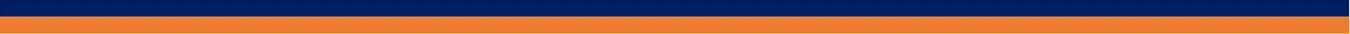